In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd

dataset_primary = pd.read_csv('/content/gdrive/My Drive/Datasets/Suicidal_cases.csv')
dataset = dataset_primary

In [4]:
dataset_primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
dataset[['year', 'suicides/100k pop']].groupby('year').count()

,suicides/100k pop
year,
1985,576
1986,576
1987,648
1988,588
1989,624
1990,768
1991,768
1992,780
1993,780


In [6]:
dataset = dataset[(dataset.year != 2016)]

In [7]:
dataset = dataset.sort_values('year')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 17073 to 16180
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27660 non-null  object 
 10  gdp_per_capita ($)  27660 non-null  int64  
 11  generation          27660 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.7+ MB


Column HDI for year(8) for year has a lot of null values.

Let's have a look at the head to get an understanding of the data.

In [8]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17073,Netherlands,1985,male,15-24 years,136,1278200,10.64,Netherlands1985,0.799,"142,009,922,306",10428,Generation X
4545,Bulgaria,1985,female,75+ years,94,222700,42.21,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
4544,Bulgaria,1985,male,75+ years,218,166200,131.17,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
24978,Thailand,1985,male,25-34 years,453,4104134,11.04,Thailand1985,0.539,"38,900,692,712",840,Boomers
24979,Thailand,1985,male,55-74 years,211,1912525,11.03,Thailand1985,0.539,"38,900,692,712",840,G.I. Generation


In [9]:
dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
dataset['country'].unique().shape

(100,)

Have a look at the transformed suicides per 100k populataion column

In [11]:
dataset.groupby('year')['suicides/100k pop'].transform('sum').unique()

array([ 6811.89,  6579.84,  7545.45,  7473.13,  8036.54,  9878.75,
       10321.06, 10528.88, 10790.29, 11483.79, 14660.26, 14142.21,
       13817.83, 14150.72, 14473.91, 14387.45, 14276.21, 14227.72,
       13627.58, 12581.8 , 12164.99, 12166.01, 12410.15, 12145.84,
       12176.04, 11843.99, 11367.84, 11101.91, 10663.64, 10306.73,
        8253.99])

In [12]:
#Exploring
dataset[(dataset['year'] == 1985) & (dataset['country'] == 'Bahamas') & (dataset['suicides_no'] == 1)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
2360,Bahamas,1985,male,35-54 years,1,21000,4.76,Bahamas1985,NaN,"2,320,699,900",11393,Silent


In [13]:
dataset.groupby('year')['suicides_no'].transform('sum').unique()

array([116063, 120670, 126842, 121026, 160244, 193361, 198020, 211473,
       221565, 232063, 243544, 246725, 240745, 249591, 256119, 255832,
       250652, 256095, 256079, 240861, 234375, 233361, 233408, 235447,
       243487, 238702, 236484, 230160, 223199, 222984, 203640])

In [14]:
#top n most values per group, still not used
top_suicide_rates_df = dataset.sort_values(['year','country','suicides/100k pop'], ascending=False)[['year', 'country', 'suicides/100k pop']].groupby(['year']).head(576)

In [15]:
suicides_per_year = dataset.groupby('year')['suicides_no'].transform('sum').unique()
population = dataset.groupby('year')['population'].transform('sum').unique()

In [16]:
suicides_per_hundredK = []
for i in range(len(suicides_per_year)):
    suicides_per_hundredK.append((suicides_per_year[i]/population[i]) * 100000)

In [17]:
year_list = dataset.year.unique()
per_hundredK_df = pd.DataFrame({'suicides per 100K': suicides_per_hundredK, 'year' : year_list})

Sneak peak is done. We have enough understanding of the dataset. Now let's go to the visual part.

In [18]:
#looking up how many countries in each year group
dataset[['country','year']].groupby('year').count().head(5)

,country
year,
1985,576
1986,576
1987,648
1988,588
1989,624


<function matplotlib.pyplot.show>

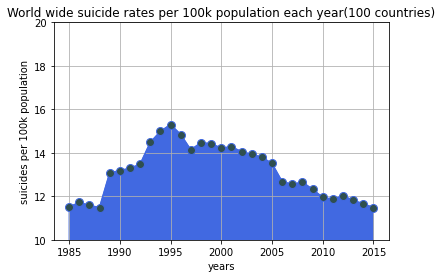

In [19]:
import matplotlib.pyplot as plt

plt.plot(year_list, suicides_per_hundredK, marker='o', markersize= 8, markerfacecolor = 'darkslategrey', color='royalblue')
plt.xlabel('years')
plt.ylabel('suicides per 100k population')
plt.title('World wide suicide rates per 100k population each year(100 countries)')
plt.grid(True, which = 'both')
plt.ylim(10, 20)
plt.fill_between(year_list, suicides_per_hundredK, color='royalblue')
plt.show

<function matplotlib.pyplot.show>

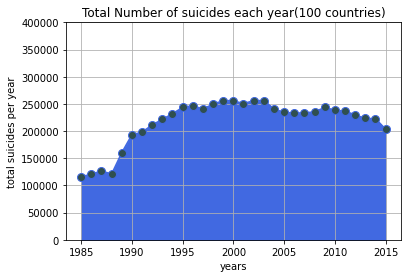

In [20]:
plt.plot(year_list, suicides_per_year, marker='o', markersize= 8, markerfacecolor='darkslategrey', color='royalblue')
plt.xlabel('years')
plt.ylabel('total suicides per year')
plt.title('Total Number of suicides each year(100 countries)')
plt.grid(True, which = 'both')
plt.fill_between(year_list, suicides_per_year, color='royalblue')
plt.ylim(0, 400000)
plt.show

Let's look at countries with the highest suicide rates in 1994, 1995, 1996 

In [21]:
dataset[((dataset['year'] == 1996) | (dataset['year'] == 1995)) & (dataset['country'] == 'Lithuania')].groupby('year').sum().sort_values(['suicides/100k pop'],ascending=False)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1995,1694,3387149,639.30,8.412,27888
1996,1722,3375163,595.61,0.000,29808


Let's see which country contributed most in the 1995's death toll

In [22]:
dataset[dataset['year'] == 1995].groupby(['country','year']).mean().sort_values(['suicides/100k pop'],ascending=False)

,,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,year,,,,,
Lithuania,1995,141.166667,2.822624e+05,53.275000,0.701,2324.0
Russian Federation,1995,5045.666667,1.159059e+07,45.615000,NaN,2844.0
Latvia,1995,85.333333,1.978917e+05,45.468333,0.670,2438.0
Estonia,1995,49.500000,1.130542e+05,45.265833,0.719,3224.0
Hungary,1995,280.500000,8.114373e+05,41.118333,0.740,4767.0
...,...,...,...,...,...,...
Azerbaijan,1995,4.083333,5.504917e+05,1.190000,0.609,462.0
Kuwait,1995,2.166667,1.259250e+05,1.061667,0.752,17995.0
Bahamas,1995,0.166667,2.120833e+04,0.596667,NaN,13473.0


In [23]:
A = dataset[dataset['year'] == 1995].groupby(['country','year']).sum().sort_values(['suicides_no'],ascending=False)

In [24]:
A.drop(['suicides/100k pop'], axis=1, inplace=True)

In [25]:
A

,,suicides_no,population,HDI for year,gdp_per_capita ($)
country,year,,,,
Russian Federation,1995,60548,139087100,0.000,34128
United States,1995,31272,243164200,10.512,378216
Japan,1995,21249,118349500,10.056,552516
Ukraine,1995,14541,48415300,7.944,11952
Germany,1995,12888,77547500,9.960,401040
...,...,...,...,...,...
Bahamas,1995,2,254500,0.000,161676
Kiribati,1995,2,65923,0.000,10260
Grenada,1995,1,88433,0.000,46428


In [26]:
B = dataset[dataset['year'] == 1995].groupby(['country','year']).mean().sort_values(['suicides/100k pop'],ascending=False)

In [27]:
B.drop(['suicides_no'], axis=1, inplace=True)

In [28]:
B

,,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,year,,,,
Lithuania,1995,2.822624e+05,53.275000,0.701,2324.0
Russian Federation,1995,1.159059e+07,45.615000,NaN,2844.0
Latvia,1995,1.978917e+05,45.468333,0.670,2438.0
Estonia,1995,1.130542e+05,45.265833,0.719,3224.0
Hungary,1995,8.114373e+05,41.118333,0.740,4767.0
...,...,...,...,...,...
Azerbaijan,1995,5.504917e+05,1.190000,0.609,462.0
Kuwait,1995,1.259250e+05,1.061667,0.752,17995.0
Bahamas,1995,2.120833e+04,0.596667,NaN,13473.0


In [29]:
dataset[dataset['year'] == 1996].groupby(['country','year']).sum().sort_values(['suicides/100k pop'],ascending=False)

,,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,year,,,,,
Lithuania,1996,1722,3375163,595.61,0.0,29808
Estonia,1996,545,1342202,528.72,0.0,42432
Russian Federation,1996,57511,139272600,526.28,0.0,33756
Latvia,1996,922,2363400,492.01,0.0,30312
Hungary,1996,3436,9737250,482.74,0.0,57504
...,...,...,...,...,...,...
Kuwait,1996,30,1568700,18.33,0.0,240912
Azerbaijan,1996,69,6668100,17.83,0.0,5712
Grenada,1996,1,89772,11.96,0.0,49044


In [30]:
dataset[dataset['year'] == 1997].groupby(['country','year']).sum().sort_values(['suicides/100k pop'],ascending=False)

,,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,year,,,,,
Lithuania,1997,1632,3364273,565.44,0.0,36096
Russian Federation,1997,54746,139283200,508.09,0.0,34884
Estonia,1997,522,1331234,502.06,0.0,45672
Latvia,1997,886,2354700,492.57,0.0,33252
Sri Lanka,1997,5887,16775409,472.10,0.0,10800
...,...,...,...,...,...,...
Azerbaijan,1997,107,6711200,18.59,0.0,7080
Bahamas,1997,2,255956,7.15,0.0,296880
Belize,1997,1,187650,5.77,0.0,41844


In [31]:
dataset.groupby(['country','year']).sum().sort_values(['suicides_no'],ascending=False)

suicides_no  ...  gdp_per_capita ($)
country               year               ...                    
Russian Federation    1994        61420  ...               34236
                      1995        60548  ...               34128
                      1996        57511  ...               33756
                      1999        56974  ...               16944
                      2001        56958  ...               26748
...                                 ...  ...                 ...
Antigua and Barbuda   1991            0  ...               95712
Kiribati              2000            0  ...               11136
Antigua and Barbuda   1994            0  ...              108744
                      1995            0  ...              103632
Saint Kitts and Nevis 1991            0  ...               64416

[2305 rows x 5 columns]

In [32]:
dataset[(dataset['year'] == 1995)].sort_values(['suicides/100k pop'],ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1258,Aruba,1995,male,75+ years,2,889,224.97,Aruba1995,NaN,"1,320,670,391",17949,G.I. Generation
11412,Hungary,1995,male,75+ years,282,169919,165.96,Hungary1995,0.740,"46,418,916,500",4767,G.I. Generation
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15045,Lithuania,1995,male,75+ years,67,47214,141.91,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
8354,Estonia,1995,male,35-54 years,227,180939,125.46,Estonia1995,0.719,"4,373,665,146",3224,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
21410,Saint Lucia,1995,female,5-14 years,0,17137,0.00,Saint Lucia1995,NaN,"640,449,501",4947,Millenials
21411,Saint Lucia,1995,female,55-74 years,0,7428,0.00,Saint Lucia1995,NaN,"640,449,501",4947,Silent
21412,Saint Lucia,1995,female,75+ years,0,2867,0.00,Saint Lucia1995,NaN,"640,449,501",4947,G.I. Generation
20062,Qatar,1995,male,55-74 years,0,14190,0.00,Qatar1995,0.783,"8,137,911,978",17559,Silent


In [33]:
dataset[(dataset['year'] == 1995)].sort_values(['suicides_no'],ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,NaN,"395,531,066,563",2844,Boomers
21009,Russian Federation,1995,male,55-74 years,11152,11227000,99.33,Russian Federation1995,NaN,"395,531,066,563",2844,Silent
21011,Russian Federation,1995,male,25-34 years,9787,10700700,91.46,Russian Federation1995,NaN,"395,531,066,563",2844,Generation X
26971,United States,1995,male,35-54 years,8545,36243300,23.58,United States1995,0.876,"7,664,060,000,000",31518,Boomers
21012,Russian Federation,1995,male,15-24 years,5733,10678300,53.69,Russian Federation1995,NaN,"395,531,066,563",2844,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
15437,Luxembourg,1995,male,5-14 years,0,24600,0.00,Luxembourg1995,0.805,"21,588,170,498",56499,Millenials
15436,Luxembourg,1995,female,5-14 years,0,23400,0.00,Luxembourg1995,0.805,"21,588,170,498",56499,Millenials
15941,Malta,1995,male,75+ years,0,5900,0.00,Malta1995,0.741,"3,439,931,907",9974,G.I. Generation
15940,Malta,1995,male,5-14 years,0,28200,0.00,Malta1995,0.741,"3,439,931,907",9974,Millenials


In [34]:
dataset[dataset['country'] == 'Lithuania'].sort_values(['suicides/100k pop'], ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
15056,Lithuania,1996,male,35-54 years,664,438770,151.33,Lithuania1996,NaN,"8,385,109,020",2484,Boomers
15044,Lithuania,1995,male,35-54 years,632,436306,144.85,Lithuania1995,0.701,"7,870,782,261",2324,Boomers
15068,Lithuania,1997,male,35-54 years,637,440546,144.59,Lithuania1997,NaN,"10,120,274,493",3008,Boomers
15045,Lithuania,1995,male,75+ years,67,47214,141.91,Lithuania1995,0.701,"7,870,782,261",2324,G.I. Generation
15128,Lithuania,2002,male,35-54 years,613,456468,134.29,Lithuania2002,NaN,"14,278,357,284",4360,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
15091,Lithuania,1998,female,5-14 years,1,265436,0.38,Lithuania1998,NaN,"11,240,360,898",3354,Millenials
15067,Lithuania,1996,female,5-14 years,1,268801,0.37,Lithuania1996,NaN,"8,385,109,020",2484,Millenials
15259,Lithuania,2012,female,5-14 years,0,141261,0.00,Lithuania2012,0.833,"42,848,195,256",15099,Generation Z
15211,Lithuania,2008,female,5-14 years,0,167804,0.00,Lithuania2008,NaN,"47,850,551,149",15669,Generation Z


In [35]:
male_suicide_rate = (dataset[dataset['sex'] == 'male'].groupby('year')['suicides_no'].transform('sum').unique() / dataset[dataset['sex'] == 'male'].groupby('year')['population'].transform('sum').unique()) * 100000
female_suicide_rate = (dataset[dataset['sex'] == 'female'].groupby('year')['suicides_no'].transform('sum').unique() / dataset[dataset['sex'] == 'female'].groupby('year')['population'].transform('sum').unique()) * 100000

<function matplotlib.pyplot.show>

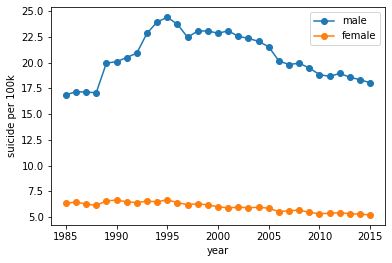

In [36]:
fig, ax = plt.subplots()

ax.plot(year_list, male_suicide_rate, marker='o')
ax.plot(year_list, female_suicide_rate, marker='o')
plt.ylabel('suicide per 100k')
plt.xlabel('year')
plt.legend(['male', 'female'])
plt.show

In [37]:
male_suicide_rate

array([16.86565523, 17.17658998, 17.13850823, 17.07907971, 19.95055636,
       20.0970145 , 20.49185815, 20.92990456, 22.84948436, 23.94550156,
       24.41080782, 23.735183  , 22.46994745, 23.06203554, 23.08544326,
       22.85322622, 23.09053972, 22.56300196, 22.35987513, 22.06590137,
       21.54610361, 20.16591956, 19.81672627, 19.94626129, 19.47505539,
       18.84558539, 18.65886476, 18.95821094, 18.5799136 , 18.34478135,
       18.04078422])

We can see that 1995 had huge suicide rate. This is very unnatural. Let's dig into it.

Is there any financial reason that relates with the suicide rate? 
let's analyze few countries.

In [38]:
suicides_per_year_japan = dataset[dataset.country == 'Japan'].groupby('year')['suicides_no'].sum()
GDP_avg_per_capita = dataset[dataset.country == 'Japan'].groupby('year')['gdp_per_capita ($)'].sum()

<function matplotlib.pyplot.show>

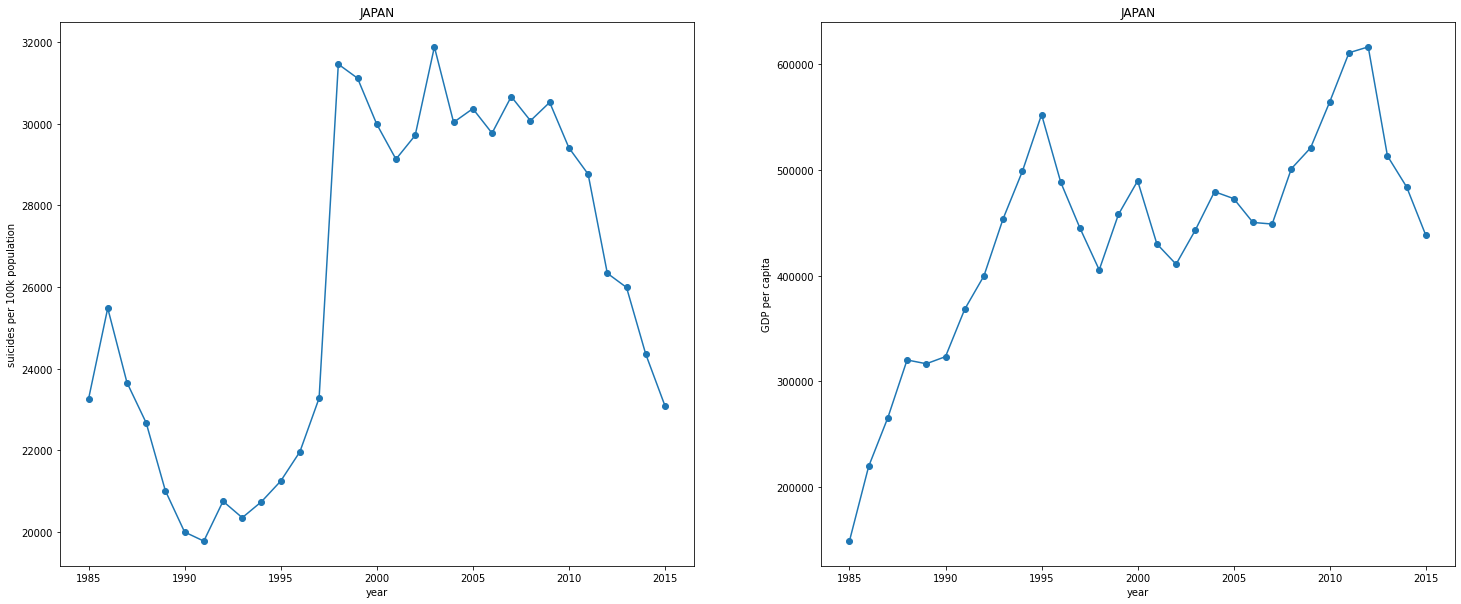

In [39]:
fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(year_list, suicides_per_year_japan, marker='o')
ax.set_ylabel('suicides per 100k population')
ax.set_xlabel('year')
ax.set_title('JAPAN')

ax = fig.add_subplot(1, 2, 2)
ax.plot(year_list, GDP_avg_per_capita, marker='o')
ax.set_ylabel('GDP per capita')
ax.set_xlabel('year')
ax.set_title('JAPAN')

plt.show

In [40]:
dataset['country'].unique()

array(['Netherlands', 'Bulgaria', 'Thailand', 'Grenada', 'Jamaica',
       'Paraguay', 'Australia', 'Republic of Korea', 'Luxembourg',
       'Brazil', 'France', 'Japan', 'Chile', 'Colombia',
       'Saint Vincent and Grenadines', 'Malta', 'Greece', 'Argentina',
       'Canada', 'Italy', 'United Kingdom', 'Uruguay', 'Ireland',
       'Portugal', 'Kuwait', 'Barbados', 'Israel', 'Bahrain', 'Bahamas',
       'Puerto Rico', 'Trinidad and Tobago', 'Belgium', 'New Zealand',
       'Iceland', 'Austria', 'United States', 'Mexico', 'Singapore',
       'Panama', 'Antigua and Barbuda', 'Seychelles', 'Ecuador',
       'Costa Rica', 'Mauritius', 'Suriname', 'Dominica', 'Sri Lanka',
       'Spain', 'Norway', 'Guatemala', 'Belize', 'Saint Lucia', 'Albania',
       'Sweden', 'Finland', 'Turkmenistan', 'Ukraine', 'Guyana',
       'Russian Federation', 'Romania', 'Georgia', 'El Salvador',
       'Czech Republic', 'Saint Kitts and Nevis', 'Germany', 'Uzbekistan',
       'Armenia', 'Azerbaijan', 'Kyrgyzst

In [41]:
suicides_per_year_usa = dataset[dataset.country == 'United States'].groupby('year')['suicides_no'].transform('sum').unique()
GDP_avg_per_capita_usa = dataset[dataset.country == 'United States'].groupby('year')['gdp_per_capita ($)'].transform('sum').unique()

<function matplotlib.pyplot.show>

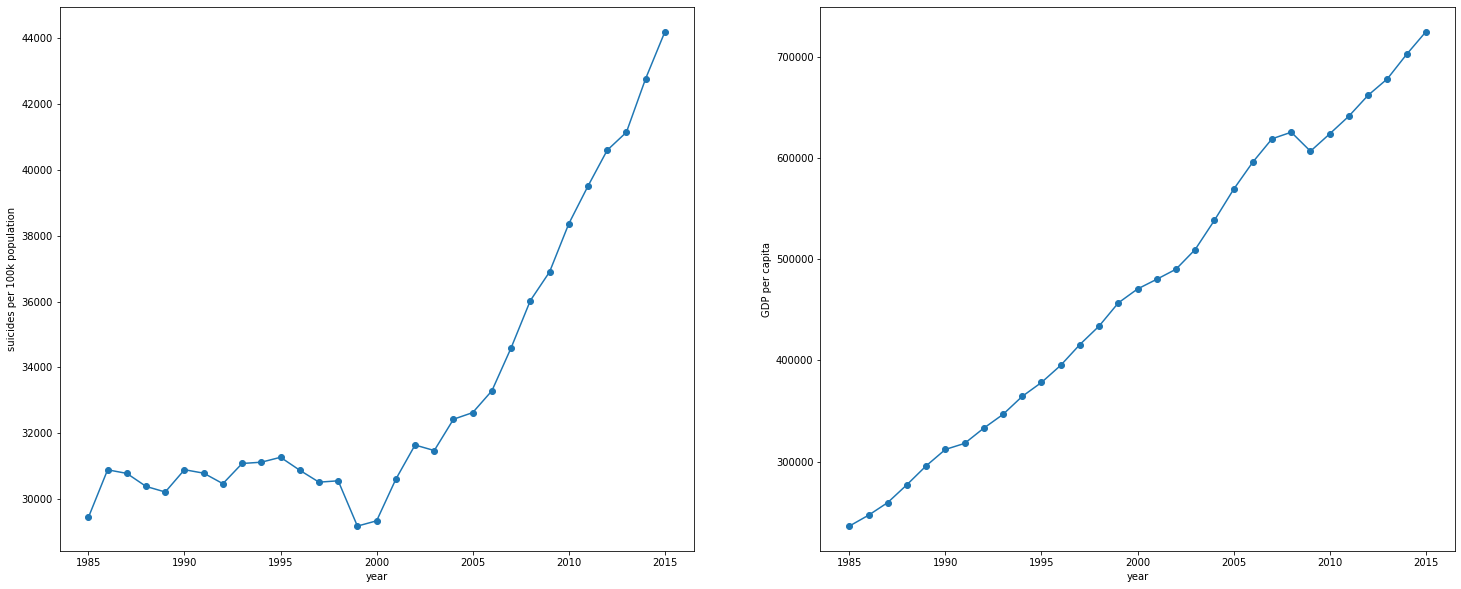

In [42]:
fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(year_list, suicides_per_year_usa, marker='o')
ax.set_ylabel('suicides per 100k population')
ax.set_xlabel('year')

ax = fig.add_subplot(1, 2, 2)
ax.plot(year_list, GDP_avg_per_capita_usa, marker='o')
ax.set_ylabel('GDP per capita')
ax.set_xlabel('year')

plt.show

In [43]:
suicides_per_year_brazil = dataset[dataset.country == 'Brazil'].groupby('year')['suicides_no'].transform('sum').unique()
GDP_avg_per_capita_brazil = dataset[dataset.country == 'Brazil'].groupby('year')['gdp_per_capita ($)'].transform('sum').unique()

<function matplotlib.pyplot.show>

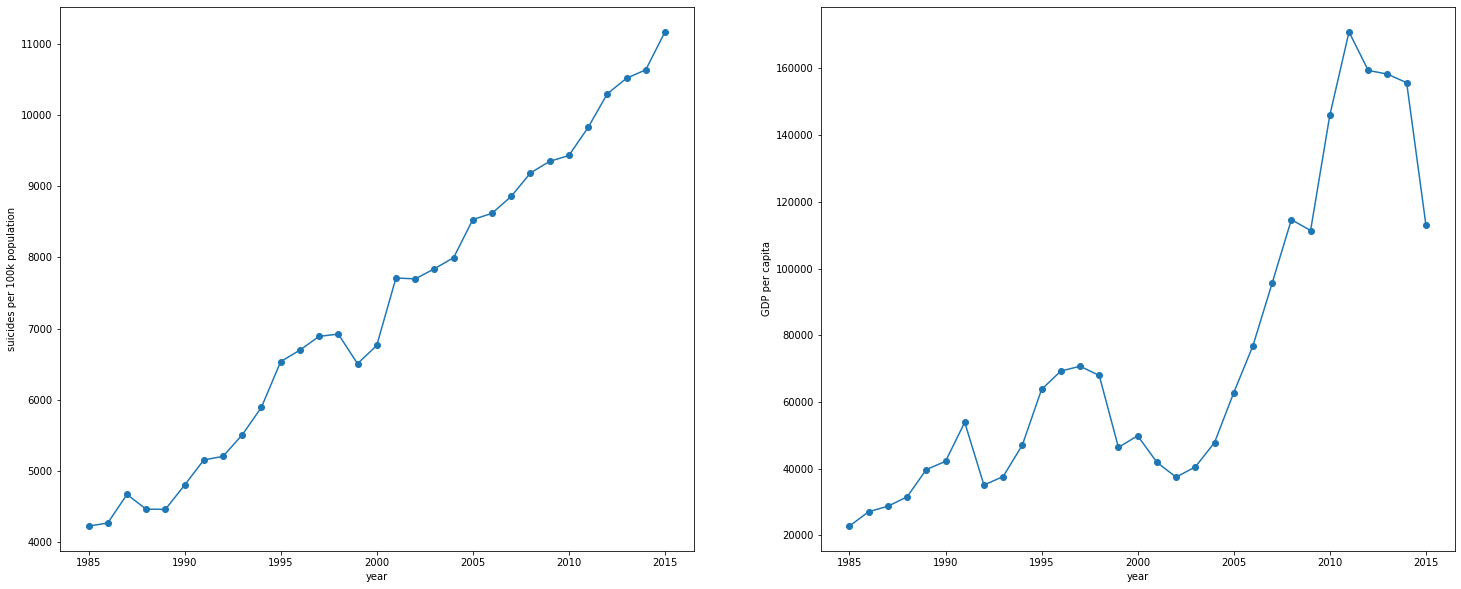

In [44]:
fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1)
ax.plot(year_list, suicides_per_year_brazil, marker='o')
ax.set_ylabel('suicides per 100k population')
ax.set_xlabel('year')

ax = fig.add_subplot(1, 2, 2)
ax.plot(year_list, GDP_avg_per_capita_brazil, marker='o')
ax.set_ylabel('GDP per capita')
ax.set_xlabel('year')

plt.show

This might suggest that Growth of GDP increases suicide rate. But that's not the case. Both the cases is influenced by other factor. It's just like the popular proof that stork delivers the babies.

In [45]:
one_suicide_rate = (dataset[dataset.age == '5-14 years'].groupby('year')['suicides_no'].sum() / dataset[dataset.age == '5-14 years'].groupby('year')['population'].sum()) * 100000
two_suicide_rate = (dataset[dataset['age'] == '15-24 years'].groupby('year')['suicides_no'].sum() / dataset[dataset['age'] == '15-24 years'].groupby('year')['population'].sum()) * 100000
three_suicide_rate = (dataset[dataset['age'] == '25-34 years'].groupby('year')['suicides_no'].sum() / dataset[dataset['age'] == '25-34 years'].groupby('year')['population'].sum()) * 100000
four_suicide_rate = (dataset[dataset['age'] == '35-54 years'].groupby('year')['suicides_no'].sum() / dataset[dataset['age'] == '35-54 years'].groupby('year')['population'].sum()) * 100000
five_suicide_rate = (dataset[dataset['age'] == '55-74 years'].groupby('year')['suicides_no'].sum() / dataset[dataset['age'] == '55-74 years'].groupby('year')['population'].sum()) * 100000
six_suicide_rate = (dataset[dataset['age'] == '75+ years'].groupby('year')['suicides_no'].sum() / dataset[dataset['age'] == '75+ years'].groupby('year')['population'].sum()) * 100000

In [46]:
one_suicide_rate= one_suicide_rate.values.reshape(-1, 1)
two_suicide_rate= two_suicide_rate.values.reshape(-1, 1)
three_suicide_rate= three_suicide_rate.values.reshape(-1, 1)
four_suicide_rate= four_suicide_rate.values.reshape(-1, 1)
five_suicide_rate= five_suicide_rate.values.reshape(-1, 1)
six_suicide_rate= six_suicide_rate.values.reshape(-1, 1)
one_suicide_rate.shape

(31, 1)

In [47]:
suicide_rates_1995 = []
suicide_rates_1995.append([one_suicide_rate[10][0], two_suicide_rate[10][0], three_suicide_rate[10][0], four_suicide_rate[10][0], five_suicide_rate[10][0], six_suicide_rate[10][0]])
print(suicide_rates_1995[0])
labels = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
print(labels)
df_suicides_1996_agegroup = pd.DataFrame({'labels': labels, 'rates' : suicide_rates_1995[0]})

[0.6946415212028801, 10.815699965955565, 15.799068865799907, 20.680066970034684, 22.08160024652771, 28.78226559656661]
['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']


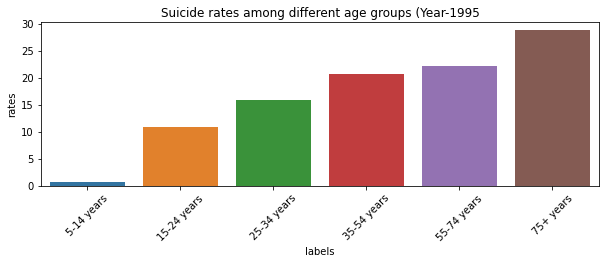

In [48]:
import seaborn as sns

plt.figure(figsize=(10,3))
sns.barplot(x = "labels", y = "rates", data = df_suicides_1996_agegroup, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(rotation=45)
plt.title('Suicide rates among different age groups (Year-1995')
plt.show()

In [49]:
year_list = year_list.reshape(-1, 1)

<function matplotlib.pyplot.show>

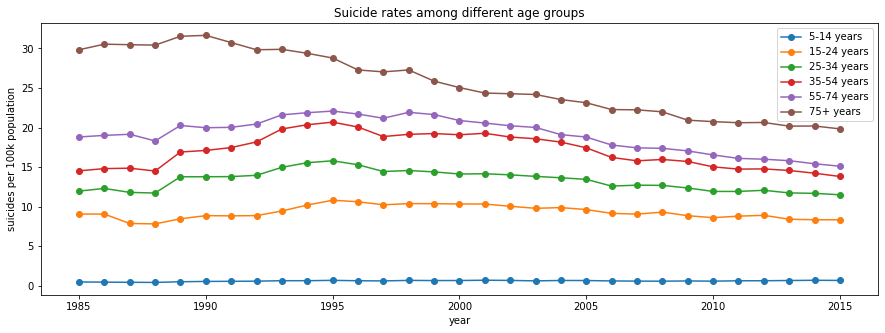

In [50]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1)
ax.plot(year_list, one_suicide_rate, marker='o', label='5-14 years')
ax.plot(year_list, two_suicide_rate, marker='o', label='15-24 years')
ax.plot(year_list, three_suicide_rate, marker='o', label='25-34 years')
ax.plot(year_list, four_suicide_rate, marker='o', label='35-54 years')
ax.plot(year_list, five_suicide_rate, marker='o', label='55-74 years')
ax.plot(year_list, six_suicide_rate, marker='o', label='75+ years')

ax.set_ylabel('suicides per 100k population')
ax.set_xlabel('year')
ax.set_title('Suicide rates among different age groups')
plt.legend()

plt.show

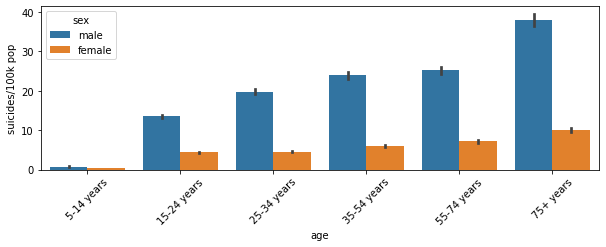

In [51]:
import seaborn as sns

plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex", data = dataset, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(rotation=45)
plt.show()

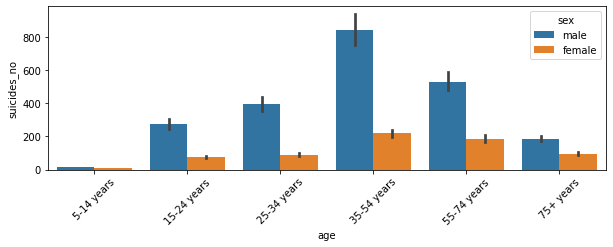

In [52]:
import seaborn as sns

plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = dataset, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xticks(rotation=45)
plt.show()

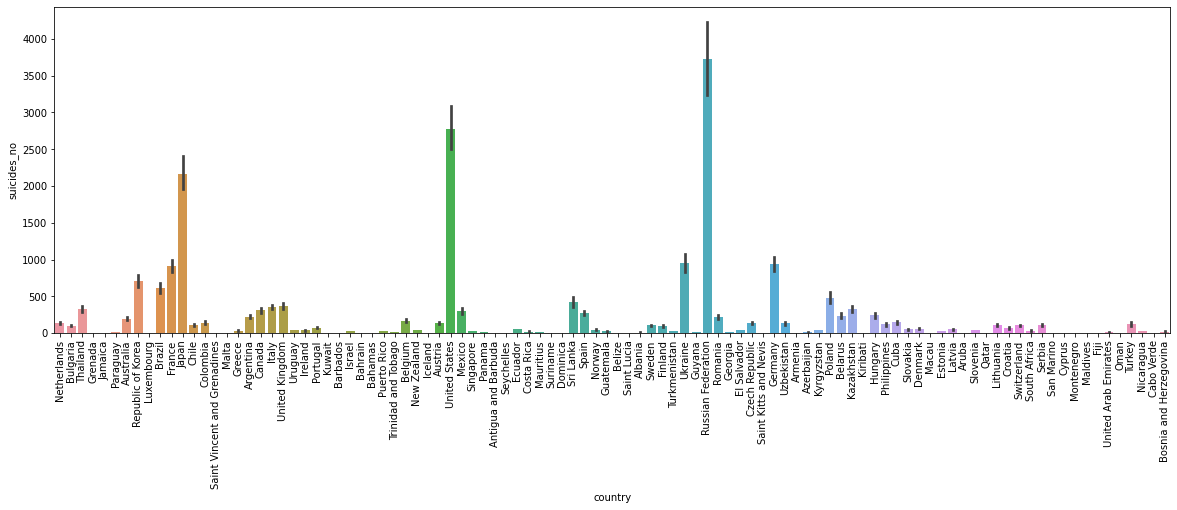

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(x = "country", y = "suicides_no",  data = dataset)
plt.xticks(rotation=90)
plt.show()

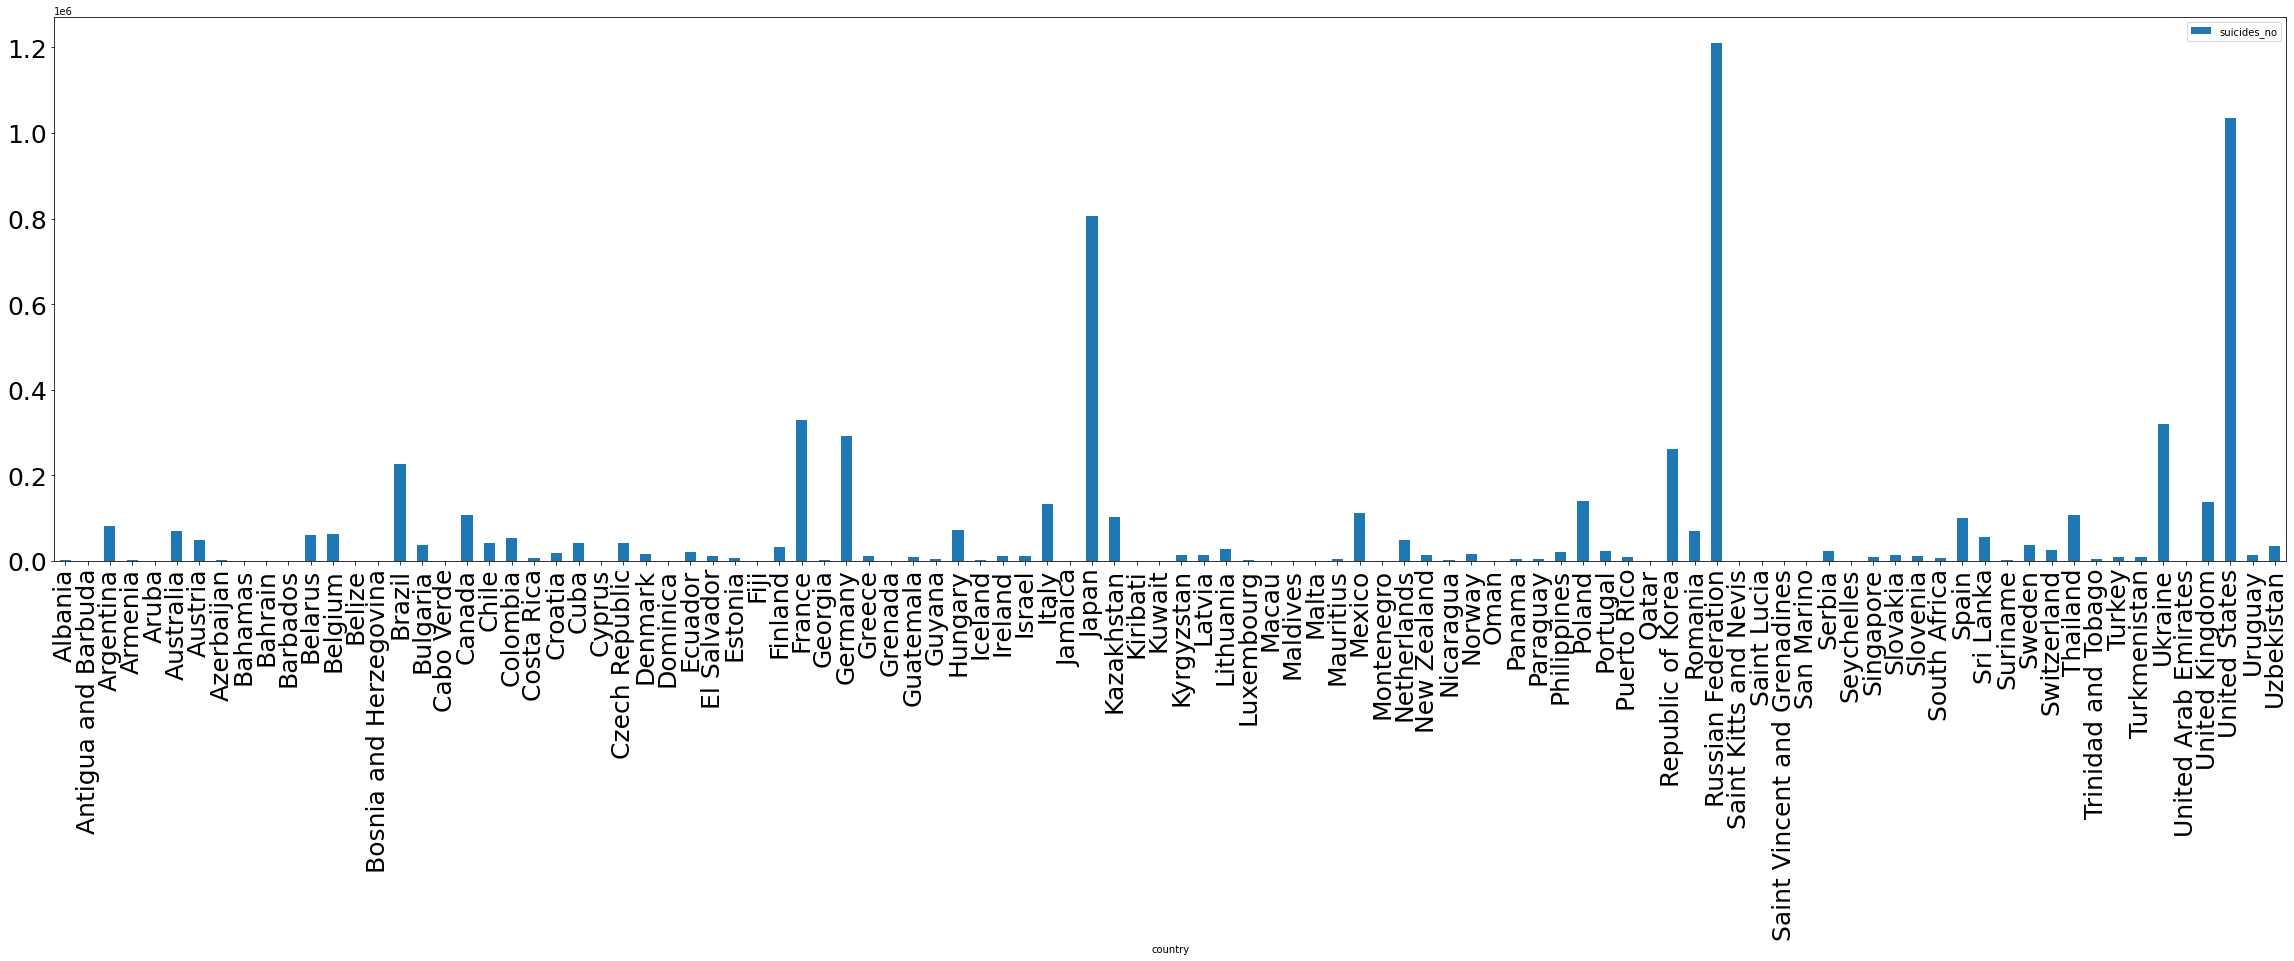

In [54]:
country_suicides = dataset[['country','suicides_no']].groupby(['country']).sum()
country_suicides.plot(kind='bar', figsize=(40,10), fontsize=25)

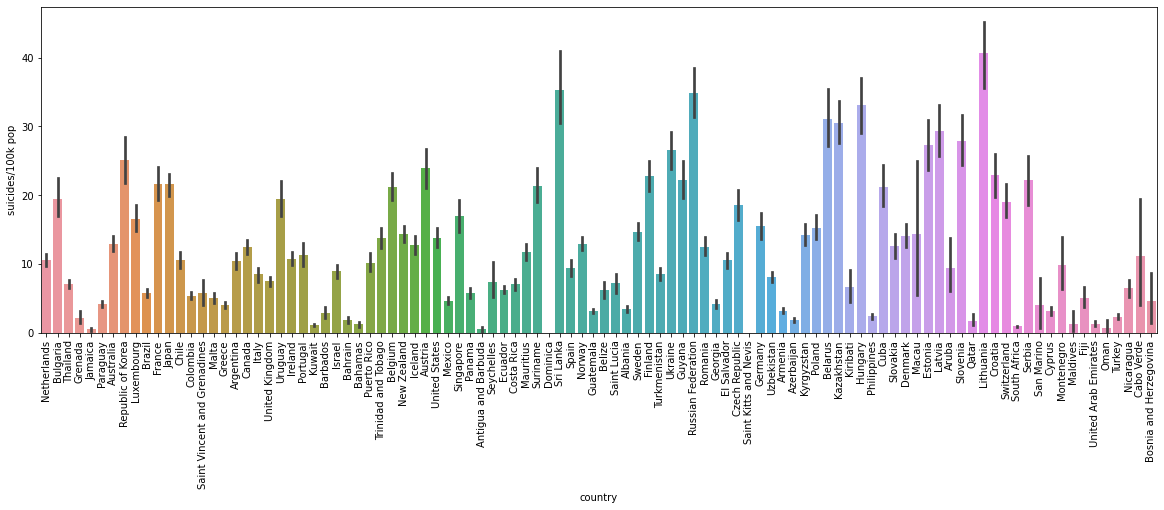

In [55]:
plt.figure(figsize=(20,6))
sns.barplot(x = "country", y = "suicides/100k pop",  data = dataset)
plt.xticks(rotation=90)
plt.show()

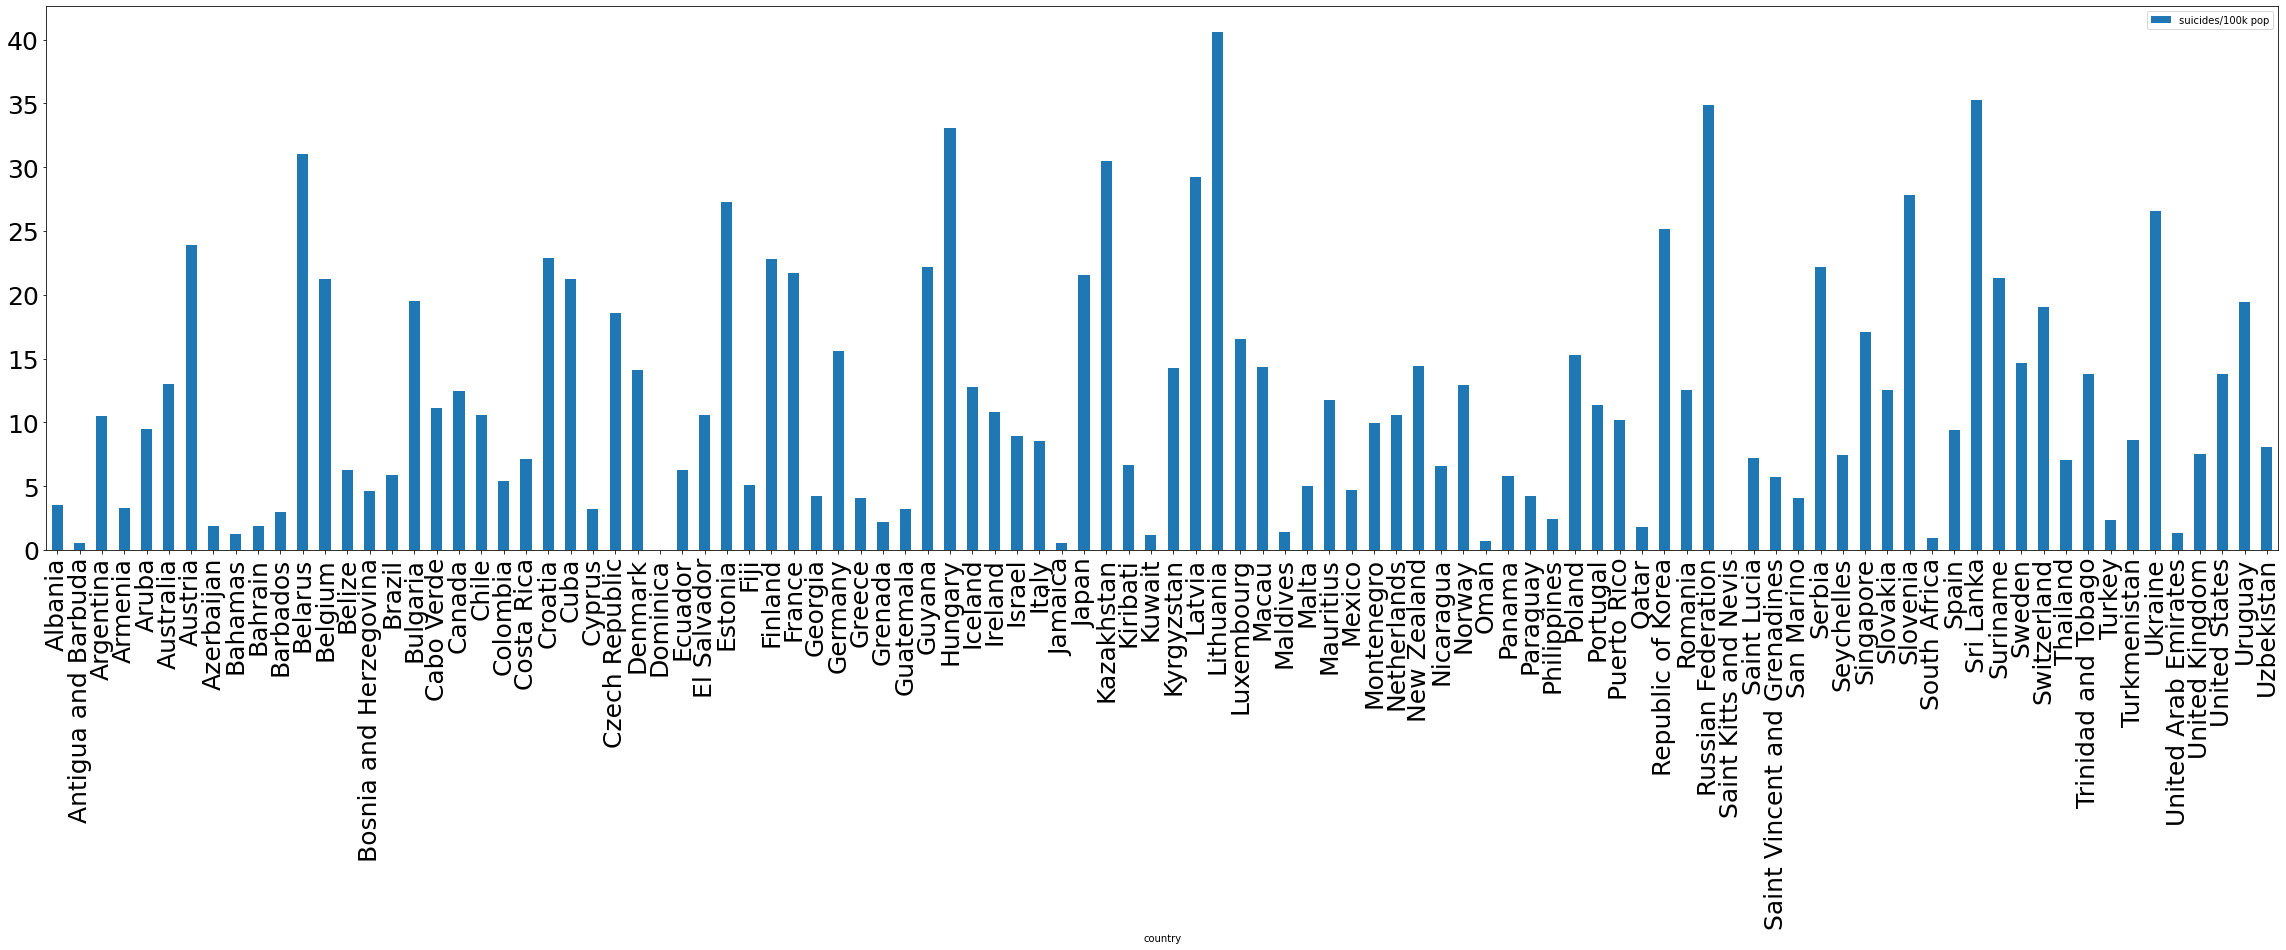

In [56]:
country_suicides_rate = dataset[['country','suicides/100k pop']].groupby(['country']).mean()
country_suicides_rate.plot(kind='bar', figsize=(40,10), fontsize=25)

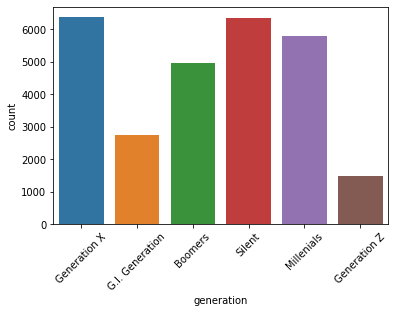

In [57]:
grid = sns.countplot(x='generation', data=dataset)
grid = plt.setp(grid.get_xticklabels(), rotation=45)

#######################NEW###############################

Poor social and economic condition, Family responsibilty and reliability
      
      -5 highest capital vs suicide rate
      -5 lowest capital vs suicide rate

In [58]:
dataset.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17073,Netherlands,1985,male,15-24 years,136,1278200,10.64,Netherlands1985,0.799,"142,009,922,306",10428,Generation X
4545,Bulgaria,1985,female,75+ years,94,222700,42.21,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
4544,Bulgaria,1985,male,75+ years,218,166200,131.17,Bulgaria1985,0.686,"17,155,421,053",2044,G.I. Generation
24978,Thailand,1985,male,25-34 years,453,4104134,11.04,Thailand1985,0.539,"38,900,692,712",840,Boomers
24979,Thailand,1985,male,55-74 years,211,1912525,11.03,Thailand1985,0.539,"38,900,692,712",840,G.I. Generation
24980,Thailand,1985,female,15-24 years,593,5558670,10.67,Thailand1985,0.539,"38,900,692,712",840,Generation X
24981,Thailand,1985,male,15-24 years,573,5671609,10.10,Thailand1985,0.539,"38,900,692,712",840,Generation X
24982,Thailand,1985,male,75+ years,28,289378,9.68,Thailand1985,0.539,"38,900,692,712",840,G.I. Generation
24983,Thailand,1985,male,35-54 years,448,4748330,9.43,Thailand1985,0.539,"38,900,692,712",840,Silent
24984,Thailand,1985,female,25-34 years,254,4232095,6.00,Thailand1985,0.539,"38,900,692,712",840,Boomers


In [59]:
dataset[(dataset['year'] == 2010) & (dataset['country'] == 'Albania')].groupby('country')

In [60]:
#1995's countries with most numbers of suicides capita vs lease suicides capita
top_5_capita = dataset[(dataset['year'] == 1995) & (dataset['suicides/100k pop'] < 50)].sort_values(['gdp_per_capita ($)'], ascending=False).groupby(['country','year'])[['gdp_per_capita ($)', 'country', 'year', 'suicides/100k pop']].head(1).iloc[:5, :]
bottom_5_capita = dataset[(dataset['year'] == 1995) & (dataset['suicides/100k pop'] > 120)].sort_values(['gdp_per_capita ($)'], ascending=True).groupby(['country','year'])[['gdp_per_capita ($)', 'country', 'year', 'suicides/100k pop']].head(1).iloc[:5, :]

In [61]:
print(top_5_capita)
print(bottom_5_capita)

       gdp_per_capita ($)      country  year  suicides/100k pop
15431               56499   Luxembourg  1995              19.11
24731               51774  Switzerland  1995              20.84
13488               46043        Japan  1995              20.13
7439                37841      Denmark  1995               2.34
17979               37483       Norway  1995              22.64
       gdp_per_capita ($)    country  year  suicides/100k pop
15045                2324  Lithuania  1995             141.91
6666                 2993       Cuba  1995             124.37
8354                 3224    Estonia  1995             125.46
11412                4767    Hungary  1995             165.96
1258                17949      Aruba  1995             224.97


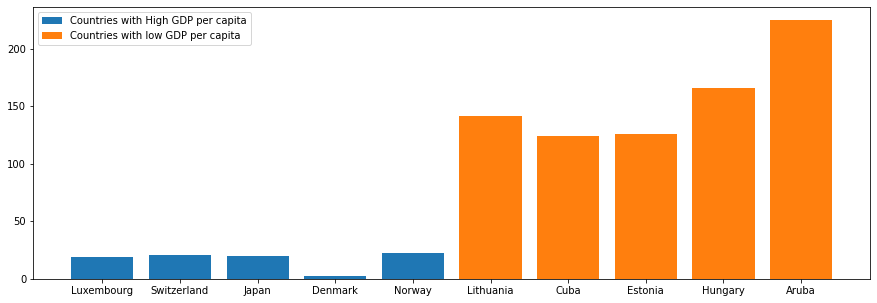

In [62]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1)
ax.bar(top_5_capita['country'], top_5_capita['suicides/100k pop'], label='Countries with High GDP per capita')
ax.bar(bottom_5_capita['country'], bottom_5_capita['suicides/100k pop'], label = 'Countries with low GDP per capita')
plt.legend()
plt.show()

In [63]:
dataset[(dataset['year'] == 1996) & (dataset['suicides/100k pop'] < 50)].sort_values(['gdp_per_capita ($)'], ascending=False).groupby(['country','year'])[['gdp_per_capita ($)', 'country', 'year', 'suicides/100k pop']].head(1).iloc[:20, :]

,gdp_per_capita ($),country,year,suicides/100k pop
15449,56169,Luxembourg,1996,0.00
24744,49621,Switzerland,1996,18.27
13497,40693,Japan,1996,37.99
17989,40098,Norway,1996,23.45
7446,38158,Denmark,1996,19.95
24482,34819,Sweden,1996,11.98
22538,34148,Singapore,1996,9.07
26980,32928,United States,1996,46.54
9792,32147,Germany,1996,0.76
1920,31660,Austria,1996,41.82
